In [23]:
import numpy as np
import matplotlib.pyplot as plt
from lib import diptrap

# experiemnt 1
- N mesuraments per cycle = 20
- N cycles = 10 (so 200 measuraments in tot)
- delay between consecutive measuraments 5ms

In [24]:
def time_correlation(vector):
    mean = np.mean(vector)
    var = np.var(vector)
    corr = 1
    for i,i_1 in zip(vector[0:-1], vector[1:]):
        #print(i,i_1, (i-mean)*(i_1-mean))
        corr = corr + (i-mean)*(i_1-mean)/var
    return corr/len(vector)

def plot_occurrences(occurrences):
    mu = np.mean(occurrences)
    std = np.std(occurrences)
    x = np.arange(int(min(occurrences)), int(max(occurrences)))

    print("mean = ", mu, "+-", std)
    print("Q = ", std**2/mu-1)
    print("time correlation = ", time_correlation(np.array(occurrences)))

    plt.hist(occurrences, bins=x, label="measured")
    plt.xlabel("Nions")
    plt.ylabel("occurrences")
    #plt.xlim([0,40])

    plt.show()
    
def get_Q(vector):
    return np.var(vector)/np.mean(vector) - 1

def Q_meaneds(vector, N_samples):
    Q_meaneds = []
    N_per_sample = int(len(vector)/N_samples)
    for i in range(N_samples):
        Q_meaneds.append(get_Q(vector[i*N_per_sample:(i+1)*N_per_sample]))
    return Q_meaneds

def means(vector, N_samples):
    means_ = []
    N_per_sample = int(len(vector)/N_samples)
    for i in range(N_samples):
        means_.append(np.mean(vector[i*N_per_sample:(i+1)*N_per_sample]))
    return means_

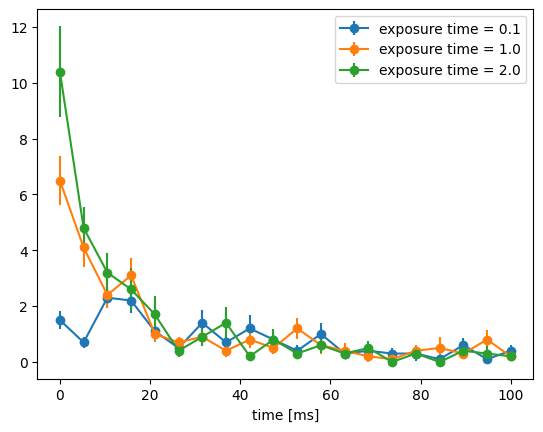

In [25]:
names = ["1_20_10_0,1", "1_20_10_1", "1_20_10_2"]
time = {"1_20_10_0,1": 0.1, "1_20_10_1": 1, "1_20_10_2": 2}
consecutive_experient_measurements = 20
delay_cons_exp = 5 # [ms]
N_cycles = 10
occurrences = np.zeros([consecutive_experient_measurements, N_cycles])

for name in names:
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%20,i//20] = (float(terms[2]))

    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    x = np.linspace(0, consecutive_experient_measurements*delay_cons_exp, consecutive_experient_measurements)
    plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="exposure time = %.1f"%time[name])
    plt.xlabel("time [ms]")
plt.legend()
plt.show()

In [26]:
sum(np.mean(occurrences, axis=1))

29.299999999999997

# experiement 2:
we just increase the density of the MOT.

87.80000000000001
153.70000000000002
128.7


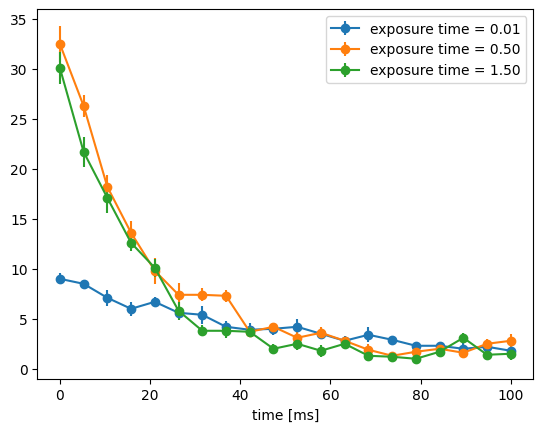

In [27]:
names = ["2_20_10_0,01", "2_20_10_0,5", "2_20_10_1,5"]
time = {"2_20_10_0,01": 0.01, "2_20_10_0,5": 0.5, "2_20_10_1,5": 1.5}
consecutive_experient_measurements = 20
delay_cons_exp = 5 # [ms]
N_cycles = 10
occurrences = np.zeros([consecutive_experient_measurements, N_cycles])

for name in names:
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%20,i//20] = (float(terms[2]))

    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    x = np.linspace(0, consecutive_experient_measurements*delay_cons_exp, consecutive_experient_measurements)
    plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="exposure time = %.2f"%time[name])
    plt.xlabel("time [ms]")
    print(sum(np.mean(occurrences, axis=1)))
plt.legend()
plt.show()

# experiment 3
n atoms vs dipole trap power

- delay photoionization-ON fields-ON : 0.7 mus
- photoionization pulse = 1 mus
- delay MOT off photoionization ON = 100 ms
- MOT cycle = 5 sec
- MOT off 1 sec
- N consicutive measuraments = 50
- single measure duration = 1 ms
- N cycles 10 (500 measures in tot)
- MOT: N = 50000 atoms, d = 2.5 10^9 cm^-3, r = 107 mus.

From this data we can extrapolate lots informations
- photoionization probability
- number of atoms in the dipole trap for dfferent powers

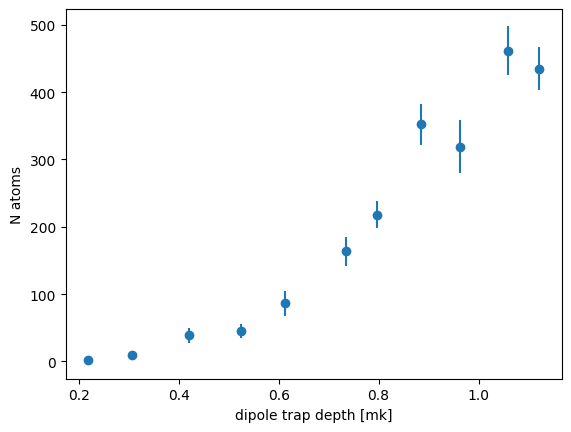

In [45]:
names = ["25", "35", "48", "60", "70", "84", "91", "101", "110", "121", "128"]
#names = ["25", "35", "48", "60", "70", "84", "91", "101", "110", "121", "128"]
#names = ["110"]
#time = {zip(names, np.)}#{"25": 0.1, "35": 1, "48": 2, "60":60, "70":70, "84":84, "91":, "101", "110", "121", "127", "128"}
consecutive_measurements = 50
cem_ = consecutive_measurements
delay_cons_exp = 1 # [ms]
N_cycles = 10
N_atoms_means = np.zeros(len(names))
N_atoms_std = np.zeros(len(names))
N_atoms_all = np.zeros([len(names), N_cycles])

powers = np.zeros(len(names))
U_dips = np.zeros(len(names))

data_all = np.zeros([consecutive_measurements, N_cycles, len(powers)])

for j, name in enumerate(names):
    occurrences = np.zeros([consecutive_measurements, N_cycles])
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-power_"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%cem_,i//cem_] = (float(terms[2]))
    
    data_all[:,:,j] = occurrences
    
    N_atoms_all[j,:] = np.sum(occurrences, axis=0)
    #print( sum(np.mean(occurrences, axis=1)))
    N_atoms_means[j] = sum(np.mean(occurrences, axis=1))
    #print(np.sum(occurrences, axis=0))
    N_atoms_std[j] = np.std(np.sum(occurrences, axis=0))
    powers[j] = int(name)

    my_dip = diptrap.dipole_trap(int(name)*1e-3*(100-13)/100, 5.5e-6)
    U_dips[j] = -my_dip.U_dip(0,0)
    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    #x = np.linspace(0, consecutive_measurements*delay_cons_exp, consecutive_measurements)
    #plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="power = "+name)
    #plt.xlabel("time [ms]")
#powers[10] = 120
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

Q_s = [get_Q(N_atoms_all[k,:]) for k in range(len(powers))]
#ax2.plot(U_dips, Q_s , c = "r", marker = "*", ls = "", label = "mandel Q")
#ax2.plot([],[],marker="o", linestyle="", label="N atoms")
#ax1.errorbar(powers, N_atoms_means, N_atoms_std, marker="o", linestyle="", label = "N atoms")
ax1.errorbar(U_dips, np.mean(N_atoms_all, axis=1)/0.4, np.std(N_atoms_all, axis=1)/0.4, marker="o", linestyle="", label = "N atoms")
#ax2.plot(powers, (N_atoms_std)**2/N_atoms_means -1 , c = "r", marker = "o", ls = "")

#plt.yscale("log")
#plt.legend()
#ax2.set_ylim([-0.3,1])
#ax2.set_ylabel("mandel Q")
ax1.set_xlabel("dipole trap depth [mk]")
ax1.set_ylabel("N atoms")
plt.show()

In [29]:
from scipy.optimize import minimize

def MLE_exp_rate(vector, delta_t_):
    mean_k = 0
    for i, value in enumerate(vector):
        mean_k += i*value
    #rate =  1/delta_t_ * np.log(sum(vector)/mean_k+1)
    rate = - 1/delta_t_ * np.log(1-1/(1+mean_k/sum(vector)))

    return rate

def exponential(rate, t):
    return rate*np.e**(-rate*t)

def min_squared_rates(vector_means, stderr, delta_t, p0=[0,0]):

    def squared_sum(x):
        N_0 = x[0]
        rate = x[1]
        summ_ = 0
        for i in range(len(vector_means)):
            summ_ += (vector_means[i] - N_0*exponential(rate, i*delta_t))**2 / stderr[i]**2
        return summ_

    result = minimize(squared_sum, x0=p0)
    #print(result)
    return result.x

from scipy.optimize import curve_fit

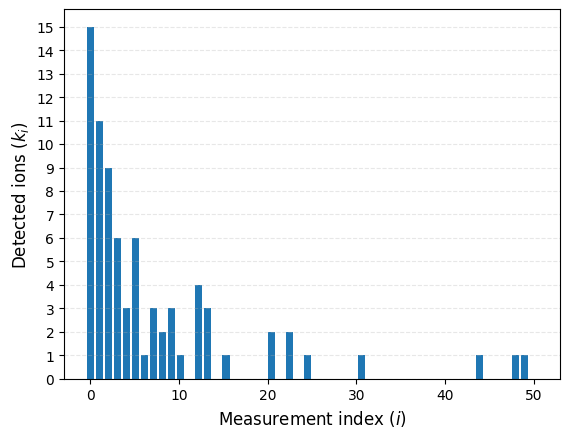

In [30]:
mease = 5
#plt.plot(x, data_all[:,mease,6], marker="o", linestyle="-", label="depth = %.2f"%U_dips[6]+" mK")
x = np.linspace(0, 50*delay_cons_exp, 50)
plt.yticks(np.arange(0,16,1))
plt.grid(axis='y', alpha=0.3, linestyle="--")
plt.bar(x, data_all[:,mease,6], label="depth = %.2f"%U_dips[6]+" mK")
plt.xlabel(r"Measurement index ($i$)", fontsize=12)
plt.ylabel(r"Detected ions ($k_i$)", fontsize=12)
plt.savefig('three_depth_histo.png', dpi=300)
plt.show()

[0.30224706 2.99633566 0.08025899]
[ 0.20733163 13.65160694  0.28392974]
[ 0.2195826  29.36157194  0.49939053]


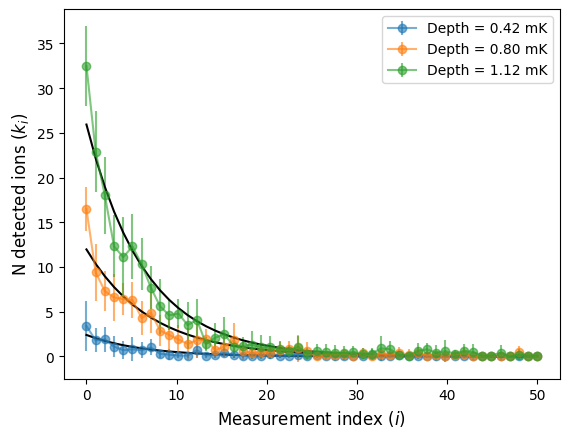

In [31]:
rates_MLE = []
drates_MLE = []

rates_ms = []
drates_ms = []

x = np.linspace(0, consecutive_measurements*delay_cons_exp, consecutive_measurements)
for power in [2,6,10]: #range(len(powers)):#[2,6,10]:
    rates = []
    for rep in range(N_cycles):
        rates.append(MLE_exp_rate(data_all[:, rep, power], 1))
    rates_MLE.append(np.mean(rates))
    drates_MLE.append(np.std(rates))
    
    #result = min_squared_rates(np.mean(data_all[:, :, power], axis=1), np.std(data_all[:, :, power], axis=1), delay_cons_exp, p0=[N_atoms_means[power],0.14])
    
    def exponential_(t, rate, A, y0):
        return A*np.e**(-rate*t)+y0

    result, _ = curve_fit(exponential_, np.linspace(0, 49, 50), np.mean(data_all[:, :, power], axis=1), p0=[0.13, 20, 0])
    print(result)
    rates_ms.append(result[0])

    y = exponential_(x, result[0], result[1], 0)
    y = exponential(np.mean(rates)*1.05, x) * N_atoms_means[power]*0.97

    #plt.plot(x, data_all[:,8,power], marker="o", linestyle="-", label="power = "+names[power]+" mW")
    plt.errorbar(x, np.mean(data_all[:,:,power], axis=1), np.std(data_all[:,:,power], axis=1), marker="o", alpha=0.6, linestyle="-", label="Depth = %.2f"%U_dips[power]+" mK")

    plt.plot(x,y, c="black")

plt.legend()
plt.xlabel(r"Measurement index ($i$)", fontsize=12)
plt.ylabel(r"N detected ions ($k_i$)", fontsize=12)
#plt.yscale("log")
#plt.savefig('three_depth_exps_fit.png', dpi=300)
plt.show()

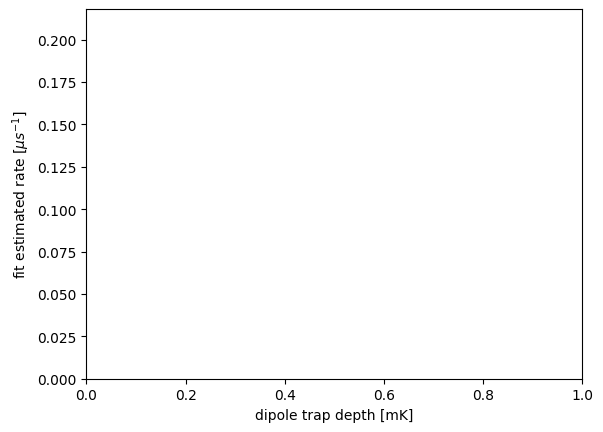

In [32]:
#plt.errorbar(U_dips[2:], np.array(rates_MLE[2:]), np.array(drates_MLE[2:]), marker="o", ls="")
#plt.plot(U_dips[2:], rates_ms[2:], marker="o", ls="")
plt.xlabel("dipole trap depth [mK]")
plt.ylabel(r"fit estimated rate [$\mu s^{-1}$]")
#plt.savefig('estimated_rate.png', dpi=300)
plt.ylim([0,0.218])
plt.show()


In [33]:
m = np.mean(rates_MLE[2:])
d = np.std(rates_MLE[2:])

print(m, "+-", d)

0.14640046169751703 +- 0.0


# Experiment 4

185.5360968383727
244.1780566535016
181.00399358774962
215.91120758929944
125.73867985744948


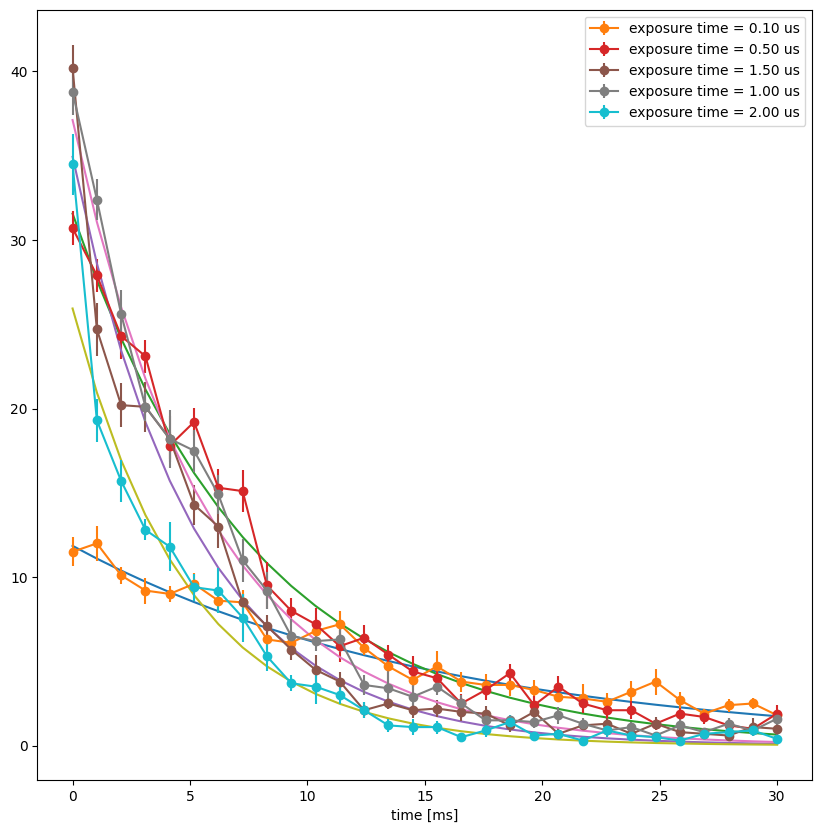

In [34]:
#names = ["3_30_10_0,1", "3_30_10_0,01", "3_30_10_0,5", "3_30_10_1,5", "3_30_10_1", "3_30_10_2"]
time = {"3_30_10_0,1": 0.1, "3_30_10_0,5": 0.5, "3_30_10_1,5": 1.5, "3_30_10_1": 1, "3_30_10_2": 2}
times = list(time.values())
consecutive_experient_measurements = 30
cem_ = consecutive_experient_measurements
delay_cons_exp = 1 # [ms]
N_cycles = 10
occurrences = np.zeros([consecutive_experient_measurements, N_cycles])

N_tots = []
N_tots_ms = []

rates_all = []
drates_all = []

rates_ms = []

plt.figure(figsize=(10,10))
for name in time.keys():
    data = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-27/F-2023-01-27-"+name+".txt", "r")
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        row = row.replace(",", ".")
        terms = row.split("\t")
        occurrences[i%cem_,i//cem_] = (float(terms[2]))

    rates = []
    for rep in range(N_cycles):
        rates.append(MLE_exp_rate(occurrences[:,rep], time[name]))# time[name]))
    rate = np.mean(rates)
    rates_all.append(rate)
    drate = np.std(rates)
    drates_all.append(drate)
    N_tot = sum(np.mean(occurrences, axis=1))

    result = min_squared_rates(np.mean(occurrences, axis=1), np.std(occurrences, axis=1), delay_cons_exp, p0=[N_atoms_means[power],rates_MLE[-1]])
    rates_ms.append(result[1])
    print(result[0])
    N_tots_ms.append(result[0])
    #data, bins = np.histogram(occurrences, bins=np.arange(0,10))
    #plot_occurrences(occurrences[:,2])
    x = np.linspace(0, consecutive_experient_measurements*delay_cons_exp, consecutive_experient_measurements)
    y = result[0]*exponential(result[1], x)
    #y = N_tot*rate*np.exp(-x*rate)
    plt.plot(x,y)
    plt.errorbar(x, np.mean(occurrences, axis=1), np.std(occurrences, axis=1)/np.sqrt(N_cycles), marker = "o", label="exposure time = %.2f"%time[name]+" us")
    plt.xlabel("time [ms]")
    N_tots.append(N_tot)
    
plt.legend()
#plt.yscale("log")
plt.show()

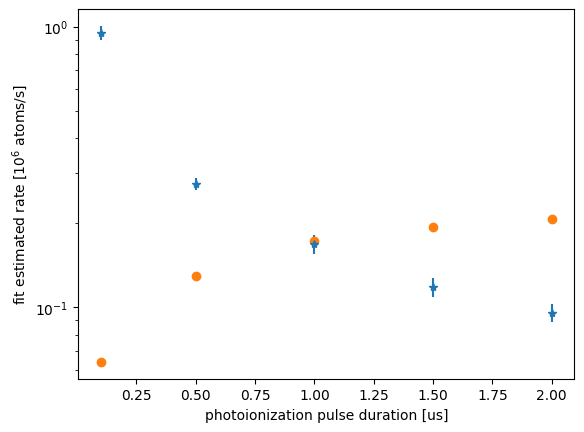

In [35]:
plt.errorbar(time.values(), rates_all, drates_all, marker="*", ls="")
plt.plot(time.values(), rates_ms, marker="o", ls="")
plt.xlabel("photoionization pulse duration [us]")
plt.ylabel(r"fit estimated rate [$10^6$ atoms/s]")
plt.yscale("log")
plt.show()

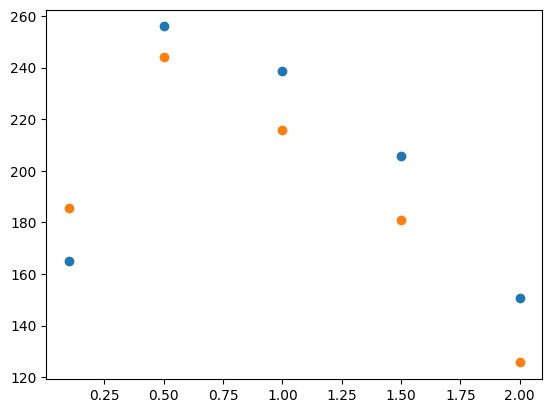

In [36]:
plt.plot(time.values(), N_tots, "o")
plt.plot(time.values(), N_tots_ms, "o")
plt.show()

In [37]:
Q_m = 0
for k in range(len(names)):
    Q_m += get_Q(N_atoms_all[k,:])
Q_m/len(names)

0.19628158540512325

In [38]:
get_Q(N_atoms_all[6,:])

-0.248105625717566

# Theoretical experiment

In [39]:
import scipy.stats as scs

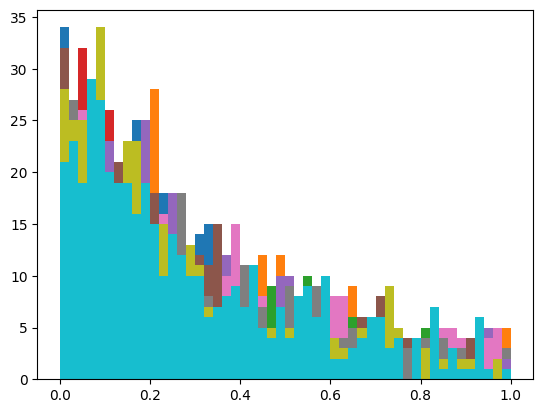

In [40]:
N_atoms_s = [250, 350, 450]
cons_meas = 50
reps = 10

rate__= 3

data_all_ = np.zeros([cons_meas, reps, len(N_atoms_s)])
bins = np.linspace(0,1,cons_meas+1)

for i, N_at in enumerate(N_atoms_s):
    for ii in range(reps):
        dat_aus = plt.hist(scs.expon(scale=1/rate__).rvs(size=N_at), bins=bins)
        data_all_[:, ii, i] = dat_aus[0]

In [41]:
cons_meas = 50
reps = 2

def get_pseudo_data(rate__):

    data_all_ = np.zeros([cons_meas, reps, len(N_atoms_s)])
    bins = np.linspace(0,1,cons_meas+1)

    for i, N_at in enumerate(N_atoms_s):
        for ii in range(reps):
            dat_aus = plt.hist(scs.expon(scale=1/(cons_meas*rate__)).rvs(size=N_at), bins=bins)
            data_all_[:, ii, i] = dat_aus[0]
    plt.close()
    return data_all_

MLE: 
 -  0.14928653619502927 +- 0.005029692859022863
curve_fit: 
 -  0.15139839178005512 +- 0.012911975152873874


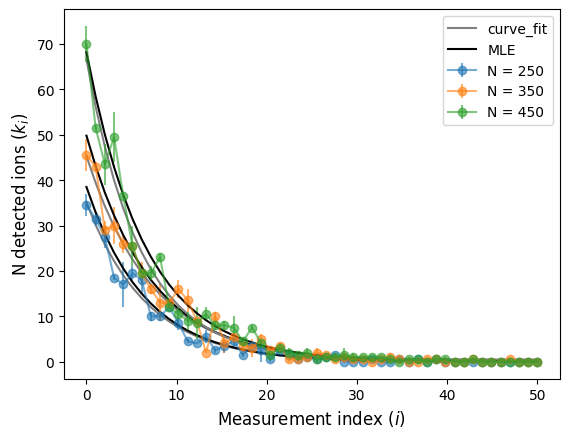

In [42]:
data_all_ = get_pseudo_data(rate__=0.15)

rates_MLE = []
drates_MLE = []

rates_ms = []
drates_ms = []

def exponential(rate, t):
    return rate*np.e**(-rate*t)

x = np.linspace(0, consecutive_measurements*delay_cons_exp, consecutive_measurements)
for power in range(len(N_atoms_s)):#[2,6,10]:
    rates = []
    for rep in range(reps):
        rates.append(MLE_exp_rate(data_all_[:, rep, power], 1))
    rates_MLE.append(np.mean(rates))
    drates_MLE.append(np.std(rates))
    
    #result = min_squared_rates(np.mean(data_all[:, :, power], axis=1), np.std(data_all[:, :, power], axis=1), delay_cons_exp, p0=[N_atoms_means[power],0.14])
    
    def exponential_(t, rate, A, y0):
        return A*np.e**(-rate*t)+y0

    result, _ = curve_fit(exponential_, np.linspace(0, 49, 50), np.mean(data_all_[:, :, power], axis=1), p0=[0.13, 20, 0])
    
    rates_ms.append(result[0])

    y = exponential_(x, *result)
    plt.plot(x,y, c="grey")

    y = exponential(np.mean(rates), x) * N_atoms_s[power]

    #plt.plot(x, data_all[:,8,power], marker="o", linestyle="-", label="power = "+names[power]+" mW")
    plt.errorbar(x, np.mean(data_all_[:,:,power], axis=1), np.std(data_all_[:,:,power], axis=1), marker="o", alpha=0.6, linestyle="-", label="N = %d"%N_atoms_s[power])

    plt.plot(x,y, c="black")

print("MLE: ")
print(" - ", np.mean(rates_MLE), "+-", np.std(rates_MLE))

print("curve_fit: ")
print(" - ", np.mean(rates_ms), "+-", np.std(rates_ms))


plt.plot([],[],c="grey", label="curve_fit")
plt.plot([],[], c="black", label="MLE")

plt.legend()
plt.xlabel(r"Measurement index ($i$)", fontsize=12)
plt.ylabel(r"N detected ions ($k_i$)", fontsize=12)
#plt.yscale("log")
#plt.savefig('three_depth_exps_fit.png', dpi=300)
plt.show()

In [43]:
rates_MLE_s = []
drates_MLE_s = []
rates_ms_s = []
drates_ms_s = []
N_atoms_s = [200,200]

rates_s = np.linspace(0.01, 0.3, 10)

for rate_ in rates_s:
    data_all_ = get_pseudo_data(rate__=rate_)

    rates_MLE = []
    drates_MLE = []

    rates_ms = []
    drates_ms = []

    def exponential(rate, t):
        return rate*np.e**(-rate*t)

    x = np.linspace(0, consecutive_measurements*delay_cons_exp, consecutive_measurements)

    for power in range(len(N_atoms_s)):
        
        def dev_std():
            a = []
            for i in range(cons_meas):
                if np.std(data_all_[i, :, power]) == 0:
                    a.append(0.1)
                else:
                    a.append(np.std(data_all_[i, :, power]))
            return np.array(a)

        rates = []
        for rep in range(reps):
            rates.append(MLE_exp_rate(data_all_[:, rep, power], 1))
        rates_MLE.append(np.mean(rates))
        drates_MLE.append(np.std(rates))
        
        #result = min_squared_rates(np.mean(data_all[:, :, power], axis=1), np.std(data_all[:, :, power], axis=1), delay_cons_exp, p0=[N_atoms_means[power],0.14])
        
        def exponential_(t, rate, A):
            return A*np.e**(-rate*t)

        result, cov = curve_fit(exponential_, np.linspace(0, 49, 50), np.mean(data_all_[:, :, power], axis=1), p0=[0.13, 20])
        #print(dev_std())
        rates_ms.append(result[0])

        #y = exponential(np.mean(rates), x) * N_atoms_s[power]

        #plt.plot(x, data_all[:,8,power], marker="o", linestyle="-", label="power = "+names[power]+" mW")
    #for power in range(len(N_atoms_s)):#[2,6,10]:
    #    plt.errorbar(x, np.mean(data_all_[:,:,power], axis=1), np.std(data_all_[:,:,power], axis=1), marker="o", alpha=0.6, linestyle="-", label="N = %d"%N_atoms_s[power])
    #    plt.plot(x,y, c="black")

    #print("MLE: ")
    #print(" - ", np.mean(rates_MLE), "+-", np.std(rates_MLE))

    #print("curve_fit: ")
    #print(" - ", np.mean(rates_ms), "+-", np.std(rates_ms))
    if len(N_atoms_s) == 1:
        std_MLE = drates_MLE[0]
        std_ms = np.sqrt(cov[0,0])
    else:
        std_MLE = np.std(rates_MLE)
        std_ms = np.std(rates_ms)
    
    rates_MLE_s.append(np.mean(rates_MLE))
    drates_MLE_s.append(std_MLE)
    rates_ms_s.append(np.mean(rates_ms))
    drates_ms_s.append(std_ms)


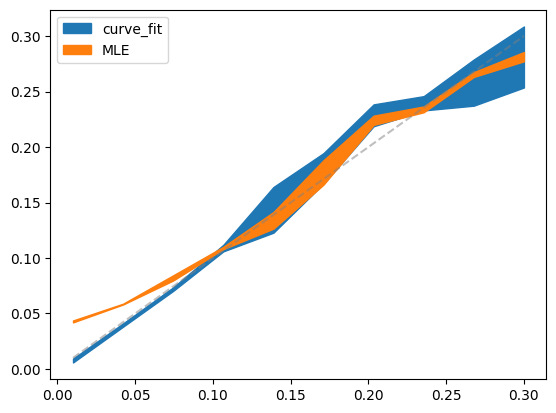

In [44]:
plt.fill_between(rates_s, np.array(rates_ms_s)-np.array(drates_ms_s),  np.array(rates_ms_s)+np.array(drates_ms_s),color="tab:blue", label="curve_fit")
plt.fill_between(rates_s, np.array(rates_MLE_s)-np.array(drates_MLE_s),  np.array(rates_MLE_s)+np.array(drates_MLE_s),color="tab:orange",label="MLE")
#plt.errorbar(rates_s, rates_ms_s, drates_ms_s, ls="", marker="o", label="curve fit")
#plt.errorbar(rates_s, rates_MLE_s, drates_MLE_s,ls="", marker="o", label="MLE")
plt.plot(rates_s,rates_s, c="grey", alpha=0.5, ls="--")

plt.legend()

plt.show()